# Fichier de visualisation des fonction de cout pour le jeu virus/antivirus

## Imports

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

## Récupération des données

In [2]:
df = pd.read_csv('res_simu/cost_little_graph_unicast_sneaky_virus.csv')

In [3]:
k_tab = df['K'].to_numpy()
ep_tab = df['epidemic peak'].to_numpy()
df['nombre infectes'] = df['nombre infectes'].apply(ast.literal_eval)
inf_tab = df['nombre infectes'].to_numpy()
cost_tab = df['cost fun'].to_numpy()
delta_tab = df['delta fun'].to_numpy()

## Construction du coût du virus

In [4]:
gain_virus = []
tol = 0.9
nb_simu = 30

for i in range(len(inf_tab)):
    gain_moyen = 0
    for j in range(nb_simu):
        t = np.array(inf_tab[i][j])
        ind_max = np.argmax(t)
        t_max = t[ind_max]
        seuil = 0.9*t_max
        tab_max = t[(ind_max+1):]
        tab_maxf = tab_max[tab_max >= seuil]
        gain_moyen += len(tab_maxf)*t_max
    gain_moyen = gain_moyen/nb_simu
    gain_virus.append(gain_moyen)

## Construction de la matrice de gains

In [5]:
res = []
for j in range(5, len(gain_virus), 5): 
    res.append((gain_virus[j], cost_tab[j]))

In [6]:
print(np.array(res))

[[15945.1          977.28811777]
 [ 4196.5          964.44290221]
 [ 2826.03333333   916.23101998]
 [ 2668.8          905.28580442]
 [ 2483.26666667   904.77392219]
 [ 2239.7          901.69537329]
 [ 2209.7          903.88349106]
 [ 2384.           925.60494217]
 [ 2294.1          964.59305994]
 [ 2106.83333333   963.44784437]
 [ 1998.23333333   960.86929548]
 [ 1941.3          994.72407992]
 [ 2130.56666667  1047.37886435]
 [ 2013.53333333  1038.33364879]
 [ 1932.4         1064.08843323]
 [ 2104.53333333  1101.576551  ]
 [ 1875.53333333  1106.93133544]
 [ 2062.43333333  1137.71945321]
 [ 2159.9         1181.84090431]
 [ 2148.7         1196.19568875]
 [ 2019.33333333  1229.85047319]
 [ 1952.73333333  1245.03859096]
 [ 2103.03333333  1280.02670873]
 [ 2121.66666667  1305.2148265 ]
 [ 2019.86666667  1317.96961094]
 [ 2060.46666667  1328.89106204]
 [ 2012.43333333  1375.34584648]
 [ 2233.33333333  1426.80063091]
 [ 2111.7         1430.05541535]
 [ 1980.96666667  1450.81019979]
 [ 1902.8 

## Affichage

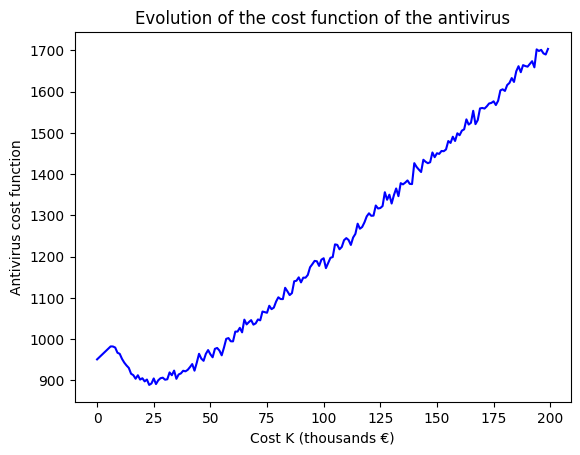

In [7]:
plt.plot(k_tab, cost_tab, 'b')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Antivirus cost function")
plt.title("Evolution of the cost function of the antivirus")
plt.savefig("sneaky_antivirus.png")
plt.show()

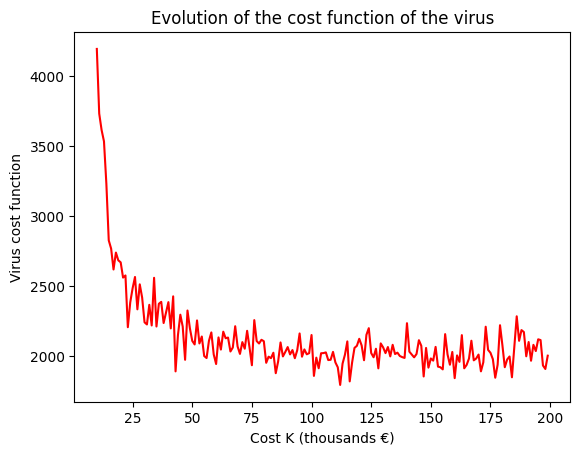

In [8]:
plt.plot(k_tab[10:], gain_virus[10:], 'r')
plt.xlabel("Cost K (thousands €)")
plt.ylabel("Virus cost function")
plt.title("Evolution of the cost function of the virus")
plt.savefig("sneaky_virus.png")
plt.show()